In [1]:
from os import listdir 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [13]:
root_dir = "data/a-scan-1/"
a_scan_data = [name for name in listdir(root_dir) if not name=="README.txt"]
sample_data = np.loadtxt(root_dir+a_scan_data[0],delimiter=',',dtype=np.complex128)
na = len(a_scan_data)
data = np.zeros(na, dtype=np.complex128)

In [14]:
def max_re(zs):
    acc = -float('inf')
    index = -1
    for  i in range(len(zs)):
        z = zs[i]
        if z.real > acc.real:
            acc = z
            index = i
    return acc,index

for i in range(na):
    a_data = np.loadtxt(root_dir+a_scan_data[i],delimiter=',',dtype=np.complex128)
    data[i], idx = max_re(a_data)

Text(0, 0.5, '$\\sigma(a)$')

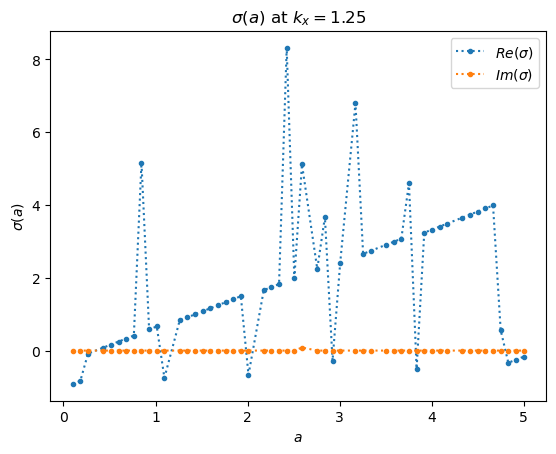

In [36]:
# had to filter out absurdly large eigenvalues 
cleaned_indices = np.where(data<10)[0]
cleaned_data = data[cleaned_indices]
cleaned_acts = acts[cleaned_indices]
plt.plot(cleaned_acts, np.real(cleaned_data),linestyle=':',marker='.')
plt.plot(cleaned_acts, np.imag(cleaned_data),linestyle=':',marker='.')
plt.legend(["$Re(\sigma)$","$Im(\sigma)$"])
plt.title("$\sigma(a)$ at $k_x=1.25$")
plt.xlabel("$a$")
plt.ylabel("$\sigma(a)$")

In [43]:
idx = 23
(acts[idx], data[idx])

(2.010169491525424, (-0.6664724576271178+0j))

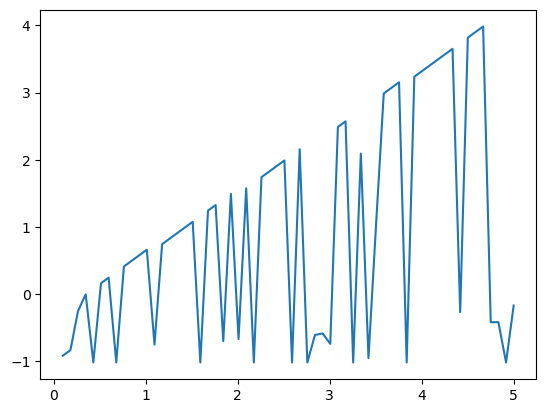

In [48]:
median_data = np.zeros(na)
for i in range(na):
    a_data = np.loadtxt(root_dir+a_scan_data[i],delimiter=',',dtype=np.complex128)
    median_data[i] = np.median(np.real(a_data))
plt.plot(acts,median_data)